UJIAN TENGAH SEMESTER

> **Klasifikasi Kanker Payudara Menggunakan Algoritma K-Nearest Neighbors (KNN) pada Dataset Breast-W**

DISUSUN OLEH

1. Nama  : I Wayan Aditya Prayana Putra
2. NIM   : 21.12.1860

# Pra-Pemrosesan Data

1. Mount Data dengan Google Drive

In [1]:
from google.colab import drive

# Mount Google Drive ke direktori /content/drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Membaca Data menggunakan library pandas

In [2]:
import pandas as pd

# Membaca dataset yang terdapat pada drive menggunakan pandas as pd
df = pd.read_csv('/content/drive/My Drive/SEMESTER 6/MACHINE LEARNING/breastcancer.csv')
df.head()

,id,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1,5,1,1,1,2,1,3,1,1,benign
1,2,5,4,4,5,7,10,3,2,1,benign
2,3,3,1,1,1,2,2,3,1,1,benign
3,4,6,8,8,1,3,4,3,7,1,benign
4,5,4,1,1,3,2,1,3,1,1,benign


In [3]:
# Menampilkan informasi ringkasan tentang DataFrame df, termasuk tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     699 non-null    int64 
 1   Clump_Thickness        699 non-null    int64 
 2   Cell_Size_Uniformity   699 non-null    int64 
 3   Cell_Shape_Uniformity  699 non-null    int64 
 4   Marginal_Adhesion      699 non-null    int64 
 5   Single_Epi_Cell_Size   699 non-null    int64 
 6   Bare_Nuclei            699 non-null    object
 7   Bland_Chromatin        699 non-null    int64 
 8   Normal_Nucleoli        699 non-null    int64 
 9   Mitoses                699 non-null    int64 
 10  Class                  699 non-null    object
dtypes: int64(9), object(2)
memory usage: 60.2+ KB


In [4]:
# Mengkonversi kolom 'Bare_Nuclei' dalam DataFrame df ke tipe data numerik
# Nilai yang tidak dapat dikonversi akan diubah menjadi NaN
df['Bare_Nuclei'] = pd.to_numeric(df.Bare_Nuclei, errors="coerce")

# Menampilkan informasi ringkasan tentang DataFrame df, termasuk tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     699 non-null    int64  
 1   Clump_Thickness        699 non-null    int64  
 2   Cell_Size_Uniformity   699 non-null    int64  
 3   Cell_Shape_Uniformity  699 non-null    int64  
 4   Marginal_Adhesion      699 non-null    int64  
 5   Single_Epi_Cell_Size   699 non-null    int64  
 6   Bare_Nuclei            683 non-null    float64
 7   Bland_Chromatin        699 non-null    int64  
 8   Normal_Nucleoli        699 non-null    int64  
 9   Mitoses                699 non-null    int64  
 10  Class                  699 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 60.2+ KB


3. Pengecekan Missing Values

In [5]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Membaca file CSV berdasarkan data df yang sudah dipanggil diatas dan dimasukan ke variable baru
cardata = df

# Menampilkan DataFrame
print("DataFrame:")
print(cardata)

# Menampilkan Jumlah Missing Values per Kolom
print("Jumlah Missing Values per Kolom:")
print(cardata.isnull().sum())

DataFrame:
      id  Clump_Thickness  Cell_Size_Uniformity  Cell_Shape_Uniformity  \
0      1                5                     1                      1   
1      2                5                     4                      4   
2      3                3                     1                      1   
3      4                6                     8                      8   
4      5                4                     1                      1   
..   ...              ...                   ...                    ...   
694  695                3                     1                      1   
695  696                2                     1                      1   
696  697                5                    10                     10   
697  698                4                     8                      6   
698  699                4                     8                      8   

     Marginal_Adhesion  Single_Epi_Cell_Size  Bare_Nuclei  Bland_Chromatin  \
0                    1

In [6]:
# Menghapus semua baris dalam DataFrame df yang mengandung nilai NaN
# inplace=True berarti perubahan akan diterapkan langsung pada DataFrame df
df.dropna(inplace=True)

In [7]:
# Membaca file CSV berdasarkan data df yang sudah dipanggil diatas dan dimasukan ke variable baru
cardata = df

# Menampilkan DataFrame
print(cardata)

# Menampilkan Jumlah Missing Values per Kolom
print("Jumlah Missing Values per Kolom:")
print(cardata.isnull().sum())

      id  Clump_Thickness  Cell_Size_Uniformity  Cell_Shape_Uniformity  \
0      1                5                     1                      1   
1      2                5                     4                      4   
2      3                3                     1                      1   
3      4                6                     8                      8   
4      5                4                     1                      1   
..   ...              ...                   ...                    ...   
694  695                3                     1                      1   
695  696                2                     1                      1   
696  697                5                    10                     10   
697  698                4                     8                      6   
698  699                4                     8                      8   

     Marginal_Adhesion  Single_Epi_Cell_Size  Bare_Nuclei  Bland_Chromatin  \
0                    1           

4. Pengecekan Duplikasi Data

In [8]:
# Mengecek duplikasi
duplicates = df.duplicated()

# Menampilkan hasil pengecekan
print("Baris yang merupakan duplikat:")
print(duplicates)

total_duplicates = duplicates.sum()
print("Total data duplikat dalam dataset :", total_duplicates)

Baris yang merupakan duplikat:
0      False
1      False
2      False
3      False
4      False
       ...  
694    False
695    False
696    False
697    False
698    False
Length: 683, dtype: bool
Total data duplikat dalam dataset : 0


4. Imbalanced Class

Class
benign       444
malignant    239
Name: count, dtype: int64


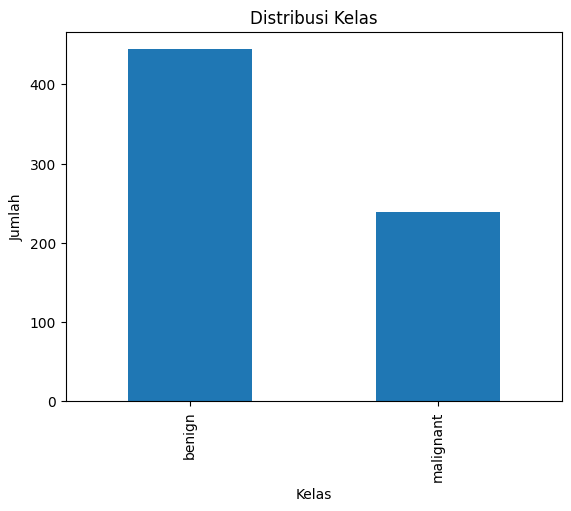

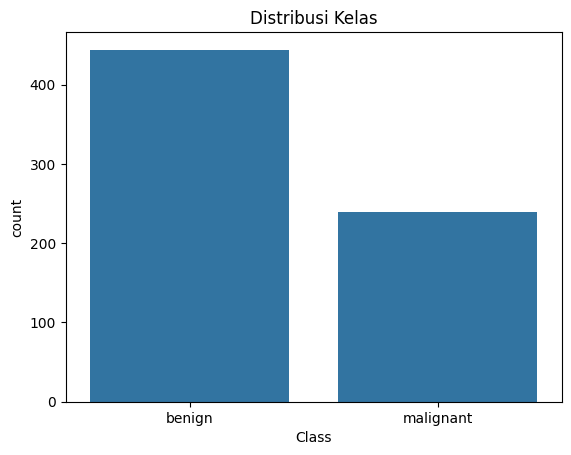

Counter({'benign': 444, 'malignant': 239})
Imbalance Ratio: 1.86


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Mengecek distribusi kelas dengan value_counts()
class_distribution = df['Class'].value_counts()
print(class_distribution)

# Visualisasi distribusi kelas dengan Matplotlib
class_distribution.plot(kind='bar')
plt.title('Distribusi Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi distribusi kelas dengan Seaborn
sns.countplot(x='Class', data=df)
plt.title('Distribusi Kelas')
plt.show()

# Menggunakan collections.Counter untuk menghitung distribusi kelas
class_distribution_counter = Counter(df['Class'])
print(class_distribution_counter)

# Menghitung rasio ketidakseimbangan
if len(class_distribution) > 1:
    imbalance_ratio = class_distribution[0] / class_distribution[1]
    print(f"Imbalance Ratio: {imbalance_ratio:.2f}")
else:
    print("Hanya Ada satu kelas dalam dataset.")

In [10]:
# Menghapus kolom 'id' dari DataFrame df
# inplace=True berarti perubahan akan diterapkan langsung pada DataFrame df
df.drop(columns='id', inplace=True)

# Menampilkan lima baris pertama dari DataFrame
df.head()


,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign


# Pemodelan

1. Import Library

In [11]:
# Import Library yang dibutuhkan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.metrics import classification_report_imbalanced

2. Menentukan Variabel Atribut dan Kelas

In [12]:
# Menentukan Variabel X (Fitur/Atribut) dan Variabel y (Kelas/Label)

X= df.drop(columns = 'Class').copy()
y= df['Class']

pd.DataFrame(y).head()

,Class
0,benign
1,benign
2,benign
3,benign
4,benign


3. Membagi Data untuk pengujian

In [13]:
# Membagi data menjadi data training dan data testing
# Data untuk testing 20%, data untuk training 80%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

4. Melakukan Normalisasi Data

In [14]:
# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Mengecek hasil normalisasi
print("X_train setelah normalisasi:\n", X_train[:5])
print("X_test setelah normalisasi:\n", X_test[:5])

X_train setelah normalisasi:
 [[-0.51298931 -0.6898418  -0.72955852  0.06158008 -0.544251   -0.68063032
  -0.9722168  -0.59477431 -0.33906568]
 [ 0.93638799  1.9303573   0.25969385  2.51323683  3.13007417 -0.12925917
   0.70762615  0.08390233  0.8869599 ]
 [ 0.21169934 -0.36231691  0.25969385 -0.63889328 -1.00354165 -0.68063032
  -0.9722168  -0.59477431 -0.33906568]
 [ 2.02342097  1.27530753  1.24894622  1.11229011  0.37433029  1.80053987
   0.28766541 -0.59477431  0.27394711]
 [-0.87533364 -0.6898418  -0.72955852 -0.63889328 -0.544251   -0.68063032
  -0.13229532 -0.59477431 -0.33906568]]
X_test setelah normalisasi:
 [[ 1.29873232 -0.03479202  0.25969385  2.16300015 -0.08496036  1.80053987
  -0.13229532  0.08390233 -0.33906568]
 [ 1.29873232  1.60283242  1.24894622  0.41181676  3.13007417  1.80053987
   1.54754763  1.78059394  3.33901106]
 [-1.23767796 -0.6898418  -0.72955852 -0.63889328 -0.544251   -0.68063032
  -0.13229532 -0.59477431 -0.33906568]
 [-1.23767796 -0.6898418  -0.3998077

5. Pembuatan Model

In [15]:
# Inisiasi Model
model = KNeighborsClassifier(n_neighbors=3)

# Training model dengan .fit()
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

6. Melakukan Prediksi pada data Test

In [16]:
# Prediksi pada data test

y_pred = model.predict(X_test)
y_pred

array(['malignant', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'benign', 'malignant', 'malignant', 'benign', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'malignant',
       'benign', 'benign', 'malignant', 'benign', 'malignant',
       'malignant', 'benign', 'malignant', 'malignant', 'benign',
       'benign', 'malignant', 'benign', 'malignant', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'malignant', 'benign',
       'malignant', 'malignant', 'benign', 'benign', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'malignant', 'malignant', 'benign', 'benign', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'malignant', 'benign',
       'benign', 'malignant', 'malignan

In [17]:
y_test

304    malignant
149    malignant
217       benign
120       benign
314       benign
         ...    
112    malignant
84     malignant
53     malignant
216       benign
563       benign
Name: Class, Length: 137, dtype: object

7. Melakukan Pengecekan Akurasi Prediksi

In [18]:
model_score = model.score(X_test, y_test)
print("KNN Test Score: {:.2f}%".format(model_score * 100))

KNN Test Score: 96.35%


In [19]:
# Memeriksa antara hasil prediksi dan data aktual

df = pd.DataFrame({'Prediksi': y_pred, 'Aktual': y_test})
df

,Prediksi,Aktual
304,malignant,malignant
149,malignant,malignant
217,benign,benign
120,benign,benign
314,benign,benign
...,...,...
112,malignant,malignant
84,malignant,malignant
53,malignant,malignant
216,benign,benign


In [20]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[78,  1],
       [ 4, 54]])

8. Mencari Nilai K yang OPTIMAL

In [21]:
# Menentukan range dari jumlah tetangga yang akan diuji dalam model KNN
k_neighbors = range(1, 15)

# List untuk menyimpan akurasi pelatihan dan pengujian untuk setiap nilai k
train_accuracy = []
test_accuracy = []

# Melakukan iterasi untuk setiap nilai k dalam range yang telah ditentukan
for n in k_neighbors:
    # Membuat instance KNeighborsClassifier dengan jumlah tetangga saat ini
    m = KNeighborsClassifier(n_neighbors=n)

    # Melatih model menggunakan data pelatihan
    m.fit(X_train, y_train)

    # Menghitung dan menyimpan akurasi model pada data pelatihan
    train_accuracy.append(m.score(X_train, y_train))

    # Menghitung dan menyimpan akurasi model pada data pengujian
    test_accuracy.append(m.score(X_test, y_test))

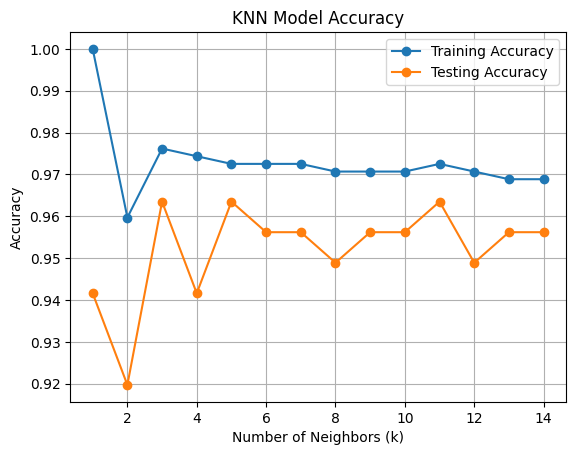

In [22]:
# Memplot grafik akurasi pelatihan untuk setiap nilai k
plt.plot(k_neighbors, train_accuracy, label="Training Accuracy", marker='o', linestyle='-')

# Memplot grafik akurasi pengujian untuk setiap nilai k
plt.plot(k_neighbors, test_accuracy, label="Testing Accuracy", marker='o', linestyle='-')

# Menambahkan judul pada grafik
plt.title('KNN Model Accuracy')

# Menambahkan label pada sumbu x
plt.xlabel('Number of Neighbors (k)')

# Menambahkan label pada sumbu y
plt.ylabel('Accuracy')

# Menambahkan legenda untuk membedakan garis pelatihan dan pengujian
plt.legend()

# Menambahkan grid pada grafik untuk memudahkan pembacaan
plt.grid(True)

# Menampilkan grafik
plt.show()

In [23]:
# Menentukan akurasi pelatihan tertinggi dari list train_accuracy
max_train_accuracy = max(train_accuracy)

# Mencari indeks dari akurasi pelatihan tertinggi tersebut
max_train_index = train_accuracy.index(max_train_accuracy)

# Menentukan nilai k terbaik untuk data pelatihan berdasarkan indeks yang ditemukan
best_k_train = list(k_neighbors)[max_train_index]

# Menentukan akurasi pengujian tertinggi dari list test_accuracy
max_test_accuracy = max(test_accuracy)

# Mencari indeks dari akurasi pengujian tertinggi tersebut
max_test_index = test_accuracy.index(max_test_accuracy)

# Menentukan nilai k terbaik untuk data pengujian berdasarkan indeks yang ditemukan
best_k_test = list(k_neighbors)[max_test_index]

# Mencetak hasil akurasi tertinggi pada data pelatihan dan nilai k yang sesuai
print("KNN Train Accuracy: {:.2f}% with k = {}".format(max_train_accuracy * 100, best_k_train))

# Mencetak hasil akurasi tertinggi pada data pengujian dan nilai k yang sesuai
print("KNN Test Accuracy: {:.2f}% with k = {}".format(max_test_accuracy * 100, best_k_test))

KNN Train Accuracy: 100.00% with k = 1
KNN Test Accuracy: 96.35% with k = 3


9. EVALUASI MODEL

In [24]:
from sklearn.metrics import accuracy_score, classification_report
from imblearn.metrics import classification_report_imbalanced


# Evaluasi Kinerja
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Classification Report Imbalanced:")
print(classification_report_imbalanced(y_test, y_pred))

Accuracy Score: 0.9635036496350365
Classification Report:
              precision    recall  f1-score   support

      benign       0.95      0.99      0.97        79
   malignant       0.98      0.93      0.96        58

    accuracy                           0.96       137
   macro avg       0.97      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

Classification Report Imbalanced:
                   pre       rec       spe        f1       geo       iba       sup

     benign       0.95      0.99      0.93      0.97      0.96      0.92        79
  malignant       0.98      0.93      0.99      0.96      0.96      0.91        58

avg / total       0.96      0.96      0.95      0.96      0.96      0.92       137



In [26]:
# prompt: save model

import pickle

# Save the model to a file
with open('model.sav', 'wb') as file:
    pickle.dump(model, file)
